In [1]:
import pandas as pd

# Load the data into a pandas DataFrame
data = pd.read_csv('spot_2.csv')
data.head()


,block_number,block_timestamp,transaction_hash,transaction_index,log_index,gas_price_eth,gas_price,trx_initiator,trx_destination,event_name,token0_in,token1_in,token0_out,token1_out,from_address,to_address,value,spot_price
0,16098989,2022-12-02 18:43:23.000,0x61f80bdd947371d2e2a733095224c3791ef6a9d09c71...,142,254,0.014268,19526874139,0xa308de214e01c365834e3344c1088b0d2b97559c,0x38f600e08540178719bf656e6b43fc15a529c393,NaN,NaN,NaN,NaN,NaN,0x0000000000000000000000000000000000000000,0x38f600e08540178719bf656e6b43fc15a529c393,2.039680,NaN
1,16098989,2022-12-02 18:43:23.000,0x61f80bdd947371d2e2a733095224c3791ef6a9d09c71...,142,257,0.014268,19526874139,0xa308de214e01c365834e3344c1088b0d2b97559c,0x38f600e08540178719bf656e6b43fc15a529c393,NaN,NaN,NaN,NaN,NaN,0x38f600e08540178719bf656e6b43fc15a529c393,0xa308de214e01c365834e3344c1088b0d2b97559c,2.039680,NaN
2,16098989,2022-12-02 18:43:23.000,0x61f80bdd947371d2e2a733095224c3791ef6a9d09c71...,142,258,0.014268,19526874139,0xa308de214e01c365834e3344c1088b0d2b97559c,0x38f600e08540178719bf656e6b43fc15a529c393,NaN,NaN,NaN,NaN,NaN,0x38f600e08540178719bf656e6b43fc15a529c393,0xa308de214e01c365834e3344c1088b0d2b97559c,0.000000,NaN
3,16098999,2022-12-02 18:45:23.000,0x1e5f3558f0cb81f658a8b63c63ab9c423a96af78f604...,138,243,0.002794,15176686844,0xa308de214e01c365834e3344c1088b0d2b97559c,0xc1f33e0cf7e40a67375007104b929e49a581bafe,NaN,NaN,NaN,NaN,NaN,0xa308de214e01c365834e3344c1088b0d2b97559c,0xc1f33e0cf7e40a67375007104b929e49a581bafe,0.018413,NaN
4,16098999,2022-12-02 18:45:23.000,0x1e5f3558f0cb81f658a8b63c63ab9c423a96af78f604...,138,244,0.002794,15176686844,0xa308de214e01c365834e3344c1088b0d2b97559c,0xc1f33e0cf7e40a67375007104b929e49a581bafe,NaN,NaN,NaN,NaN,NaN,0xa308de214e01c365834e3344c1088b0d2b97559c,0x0000000000000000000000000000000000000000,1.841280,NaN


In [3]:
data = data[data["event_name"] == "Swap"]

In [4]:
type(data)
data.dropna(subset=["event_name"], inplace=True)

In [5]:
# Sort the data by timestamp
data.sort_values(by='block_timestamp', inplace=True)
data.shape


(665, 18)

In [6]:

data.drop_duplicates(subset=["transaction_hash"], inplace=True)

In [7]:
data.shape

(665, 18)

In [106]:
data.tail()

,block_number,block_timestamp,transaction_hash,transaction_index,log_index,gas_price_eth,gas_price,trx_initiator,trx_destination,event_name,token0_in,token1_in,token0_out,token1_out,from_address,to_address,value,spot_price
2283,16701284,2023-02-24 22:56:11.000,0x5865618115ff62e4fdd12c68b520a941fe590128ba3e...,94,134,0.003786,25072487809,0x970048ba62de979f81eb93da355bc64f94c33410,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,Swap,NaN,2719.453688,3077.608951,NaN,NaN,NaN,NaN,1.131701
2284,16701742,2023-02-25 00:28:47.000,0x1555079fb2621d704b4c5460fba2c3ae7ce9b9a860bb...,100,304,0.009144,26992628497,0x1bb818c7c1314b38a986bf1a7f0be3370c3a8024,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,Swap,389.151256,NaN,NaN,341.854308,NaN,NaN,NaN,1.138354
2285,16701765,2023-02-25 00:33:35.000,0x2709971b6a82fe71b35d65c631cd6154cfea2367e945...,65,131,0.009912,25691780082,0x1bb818c7c1314b38a986bf1a7f0be3370c3a8024,0xdd92062adf9f6edf528babe7f04804fe86424a74,Increase liquidity,40.588028,341.854000,NaN,NaN,NaN,NaN,NaN,1.138354
2286,16703912,2023-02-25 07:46:35.000,0xc2c37b82df2bfd1dca3143419224c3727550cf226af7...,84,240,0.007800,23609349261,0x1968b10a46301da12883929247f5ca139b993e9c,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,Swap,3169.301215,NaN,NaN,2783.567107,NaN,NaN,NaN,1.138575
2294,16708834,2023-02-26 00:25:23.000,0x9e4a27393724ef3aa49c527437f7a0b9524f573348ed...,142,271,0.005298,18509334122,0x17f5d60a362c4d652a87c7f0f94c35251b982580,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,Swap,5057.679941,NaN,NaN,4440.116309,NaN,NaN,NaN,1.139087


In [8]:
data.drop_duplicates(subset=["transaction_hash"], inplace=True)
data.shape
data.fillna(0, inplace=True)
data["block_timestamp"] = pd.to_datetime(data["block_timestamp"])

for i in range(data.shape[0]):
    if(data["value"].iloc[i] == 0.00):
        #print(data["value"].iloc[0] , "   ",  (data["token1_in"].iloc[i] + data["token1_out"].iloc[i]))
        data["value"].iloc[i] = (data["token1_in"].iloc[i] + data["token1_out"].iloc[i])

C:\Users\user\AppData\Local\Temp\ipykernel_11560\2828775815.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["value"].iloc[i] = (data["token1_in"].iloc[i] + data["token1_out"].iloc[i])


In [15]:
LAST_7_DAYS = data[(data["block_timestamp"] >= dt1) & (data["block_timestamp"] <=dt2)]
LAST_7_DAYS["Sum"] = (LAST_7_DAYS["value"]) * LAST_7_DAYS["spot_price"]
LAST_7_DAYS = LAST_7_DAYS.groupby([LAST_7_DAYS["block_timestamp"].dt.day]).agg("sum")

C:\Users\user\AppData\Local\Temp\ipykernel_11560\962792247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LAST_7_DAYS["Sum"] = (LAST_7_DAYS["value"]) * LAST_7_DAYS["spot_price"]
C:\Users\user\AppData\Local\Temp\ipykernel_11560\962792247.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  LAST_7_DAYS = LAST_7_DAYS.groupby([LAST_7_DAYS["block_timestamp"].dt.day]).agg("sum")


In [16]:
LAST_7_DAYS

,block_number,transaction_index,log_index,gas_price_eth,gas_price,token0_in,token1_in,token0_out,token1_out,from_address,to_address,value,spot_price,Sum
block_timestamp,,,,,,,,,,,,,,
1,66143224,439,968,0.030176,113867930027,4046.164162,712.346641,812.821031,3524.779465,0,0,4237.126105,4.578035,4858.985193
2,297726438,1563,3373,0.101725,399706582288,17591.461410,41832.011679,47654.893508,15348.746181,0,0,57180.757860,20.518949,65246.354918
3,33097049,136,246,0.016678,63700351675,7138.383861,4026.126029,4580.753202,6237.443162,0,0,10263.569190,2.282198,11719.137063
4,215212920,834,1922,0.067225,268765984087,613.481084,26942.776520,30590.367462,537.600793,0,0,27480.377313,14.784280,31203.848546
5,82811917,853,1409,0.020062,98906250479,664.011047,815.966939,924.755680,582.391481,0,0,1398.358420,5.680216,1588.766727
6,49706738,188,507,0.018408,70563124329,15000.000000,5381.860215,6098.934689,13152.360492,0,0,18534.220707,3.408058,21098.934689
7,49727637,112,471,0.023848,80846802845,8177.818314,7122.522395,8084.447593,7161.618534,0,0,14284.140928,3.418956,16262.265907


In [17]:
from datetime import datetime
dt = "2023-02-01"
dt1 = datetime.strptime(dt, "%Y-%m-%d")
print(dt)
dt = "2023-02-08"
dt2 = datetime.strptime(dt, "%Y-%m-%d")

2023-02-01


<AxesSubplot:xlabel='Time', ylabel='Sum'>

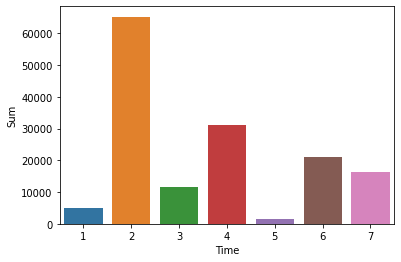

In [20]:
import seaborn as sns

sns.barplot(LAST_7_DAYS, x = "Time", y = "Sum")

In [19]:
LAST_7_DAYS["Time"] = LAST_7_DAYS.index

In [123]:
data.head()

,block_number,block_timestamp,transaction_hash,transaction_index,log_index,gas_price_eth,gas_price,trx_initiator,trx_destination,event_name,token0_in,token1_in,token0_out,token1_out,from_address,to_address,value,spot_price
57,16142126,2022-12-08 19:37:47,0x7807fe52329a771a1707bbaaa6d066f3134e158a1900...,185,472,0.105097,20253822624,0xfe2321d7dfa492dfc39330e8b85e7c49161e7f98,0xc36442b4a4522e871399cd717abdd847ab11fe88,Initialize,0.000000,0.0,0.0,0.000000,0,0,0.000000,0.000000
59,16142130,2022-12-08 19:38:35,0x4b55fb44121ffae6f17d880f0c46ab6963274b1899e1...,228,452,0.005761,24000000000,0x6a0feb37e1b03ee1b599277a7cb57192b4890917,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,Swap,4.950369,0.0,0.0,4.340066,0,0,4.340066,1.140621
60,16142131,2022-12-08 19:38:47,0x3e6ac2f5c4085615c04c495c7ec4d56965c793c87afa...,10,38,0.005782,26013689757,0xab65c530a1017dca7c8610bed0493e0a68261640,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,Swap,128.166889,0.0,0.0,111.843736,0,0,111.843736,1.145946
61,16142135,2022-12-08 19:39:35,0x9b9261342b02854a233cab7eab9c114dd8f81f39f6c2...,0,2,0.003156,23134554132,0x607bd5bbc7c6a2111273b28d4309e5c04b024f00,0x46c4128981525aa446e02ffb2ff762f1d6a49170,Swap,1674.259198,0.0,0.0,1374.168622,0,0,1374.168622,1.218380
62,16142135,2022-12-08 19:39:35,0x57069d1c653ed7c3914f35cbf9f339e03d2f8409d33f...,1,9,0.006906,34134554132,0xab65c530a1017dca7c8610bed0493e0a68261640,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,Swap,256.345906,0.0,0.0,197.113432,0,0,197.113432,1.300499


<AxesSubplot:xlabel='Time', ylabel='Sum'>

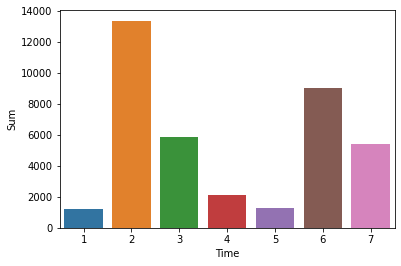

In [124]:
import seaborn as sns

sns.barplot(LAST_7_DAYS, x = "Time", y = "Sum")

In [125]:
LAST_7_DAYS

,block_number,transaction_index,log_index,gas_price_eth,gas_price,token0_in,token1_in,token0_out,token1_out,from_address,to_address,value,spot_price,Sum,Time
block_timestamp,,,,,,,,,,,,,,,
1,1.653581e+07,109.750000,242.000000,0.007544,2.846698e+10,1011.541041,178.086660,203.205258,881.194866,0.0,0.0,1059.281526,1.144509,1214.746298,1
2,1.654058e+07,91.863636,229.136364,0.006235,2.253575e+10,2183.148942,6710.632349,3379.294860,5038.687814,0.0,0.0,11749.320163,1.139903,13375.166852,2
3,1.654852e+07,68.000000,123.000000,0.008339,3.185018e+10,3569.191931,2013.063014,2290.376601,3118.721581,0.0,0.0,5131.784595,1.141099,5859.568532,3
4,1.655494e+07,65.866667,156.400000,0.005604,2.088797e+10,45.767164,1825.400635,2039.357831,35.840053,0.0,0.0,1861.240687,1.137641,2113.567130,4
5,1.656256e+07,132.250000,229.750000,0.004811,1.943129e+10,168.966640,617.574218,263.888920,507.929908,0.0,0.0,1125.504127,1.135868,1279.329859,5
6,1.656851e+07,77.000000,210.750000,0.006136,2.157855e+10,4420.004385,4633.565053,1524.733672,3288.090123,0.0,0.0,7921.655176,1.137135,9024.744936,6
7,1.657588e+07,69.333333,197.333333,0.008589,2.760480e+10,1630.154756,2380.688732,1621.773578,2379.617400,0.0,0.0,4760.306132,1.140845,5428.027973,7
